# In the following notebook, I have implemented techniques to take care of outliers for normally distributed and skewed feature columns by taking an example involving Age and Fare columns from Titanic dataset Survival prediction problem.

Feel free to upvote if you found it useful.

Thanks

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')

In [4]:
df=train.copy()

# 1. Age

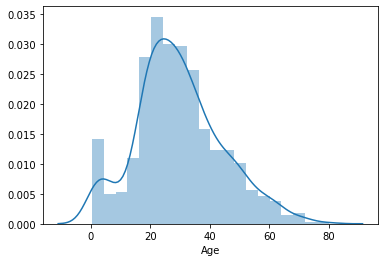

In [5]:
sns.distplot(df['Age'].dropna())

Text(0, 0.5, 'No. of Passengers')

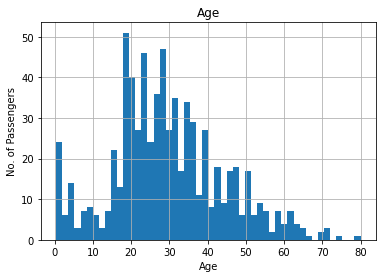

In [6]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of Passengers')

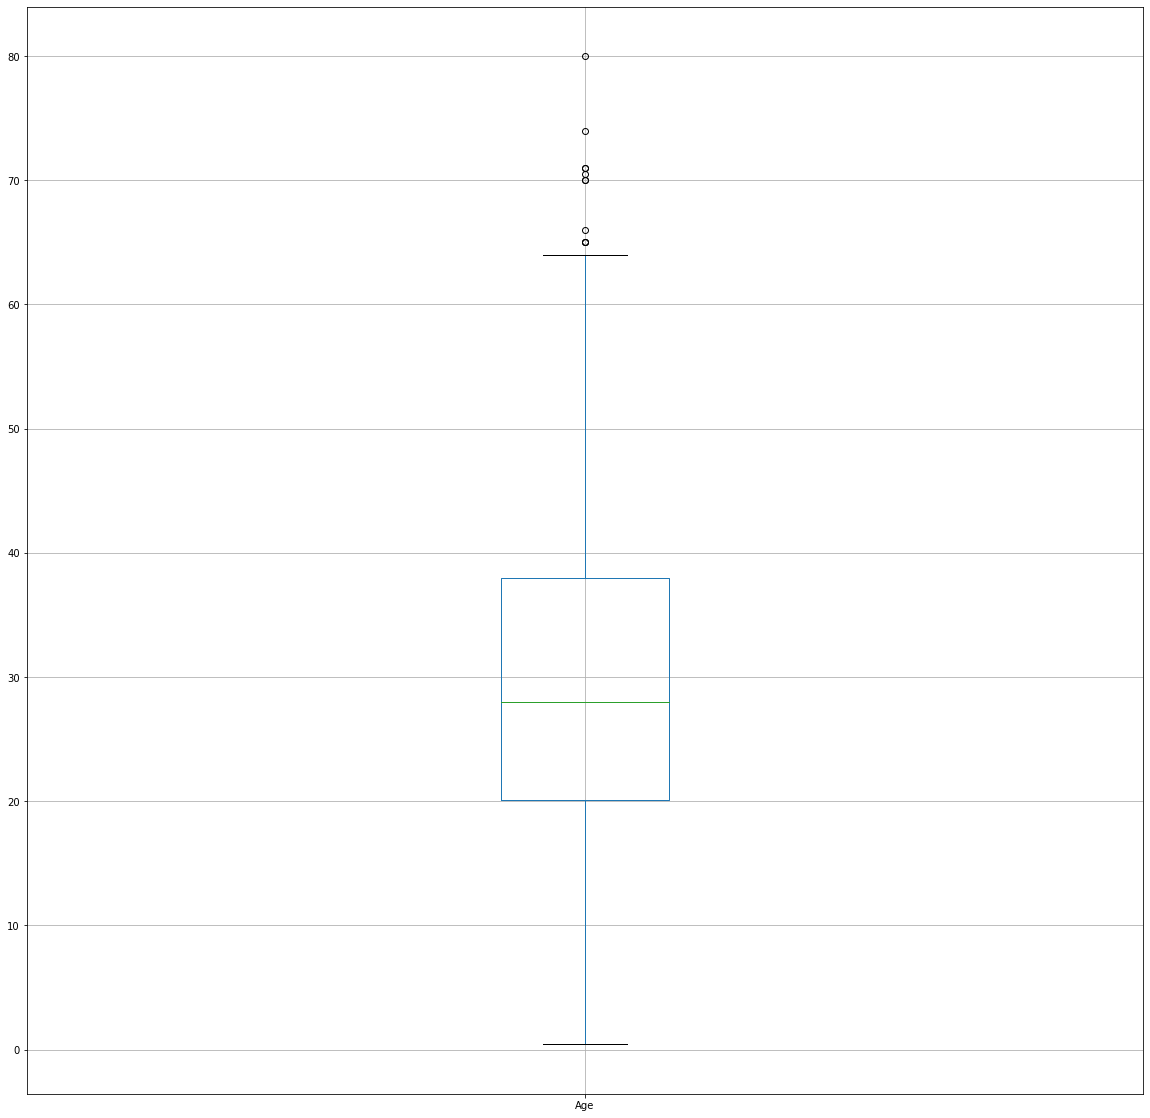

In [7]:
figure=df.boxplot(column="Age", figsize=(20,20))

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
uppper_boundary=df['Age'].mean() + 1.5* df['Age'].std()
lower_boundary=df['Age'].mean() - 1.5* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

7.909371648557755
51.48886364555989
29.69911764705882


(None, None, None)

We will not consider "*1.5* df['feature'].std()" because upper boundary age extreme point is around 63 to 67 years whereas from above calculation, we are getting 51.5 or, 52 years as upper boundary of age.If we consider this as our upper boundary, many of our 'true' age data will be lost. So, we'll consider below case of "*3* df['feature'].std()" instead.

In [10]:
##### Assuming Age follows a Gaussian Distribution, we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

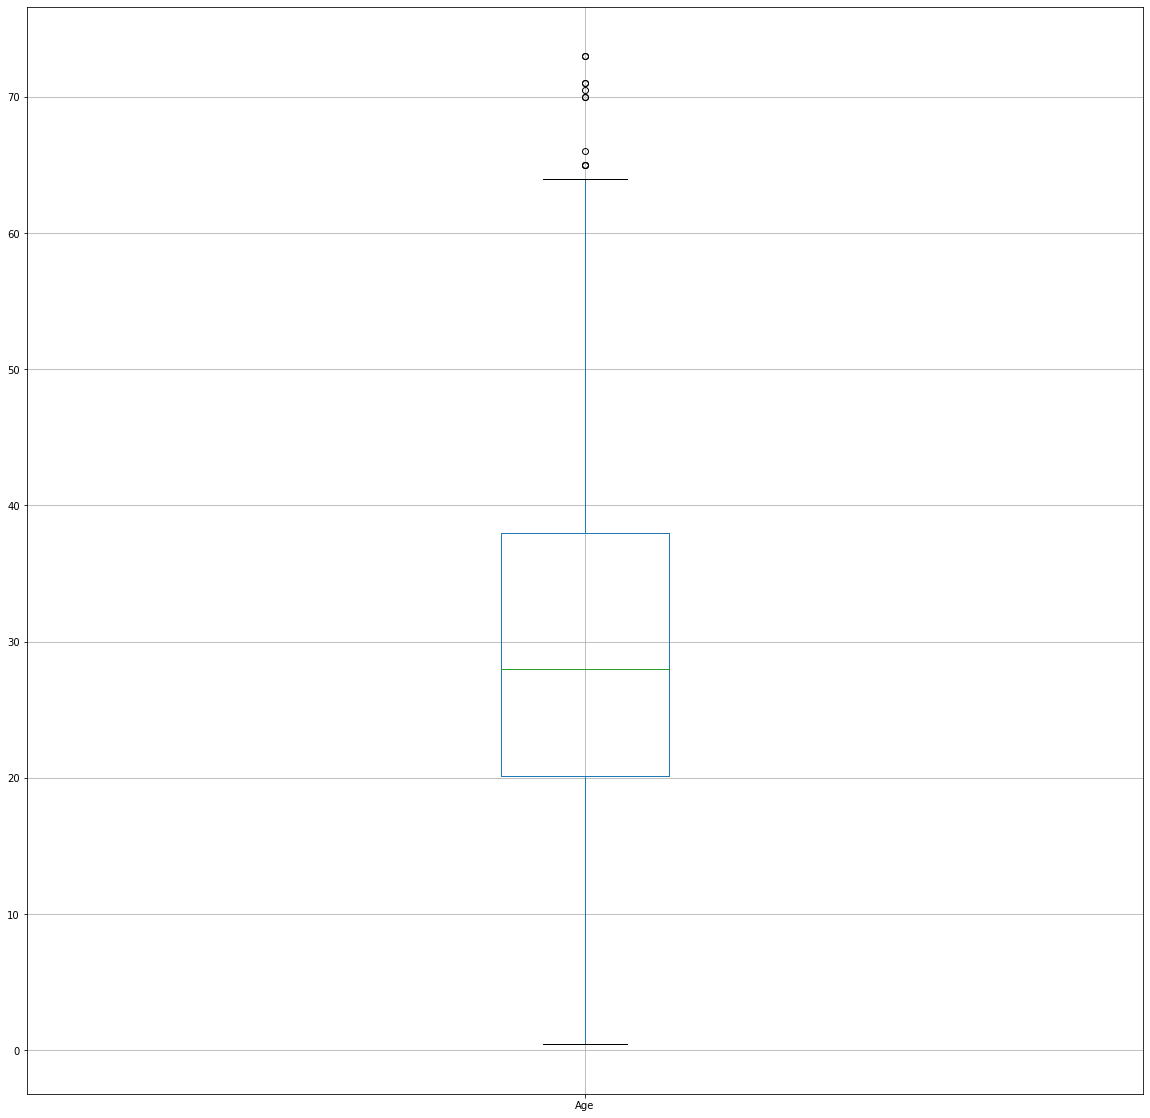

In [11]:
df.loc[df['Age']>=73,'Age']=73
figure=df.boxplot(column="Age",figsize=(20,20))

Text(0, 0.5, 'No. of Passengers')

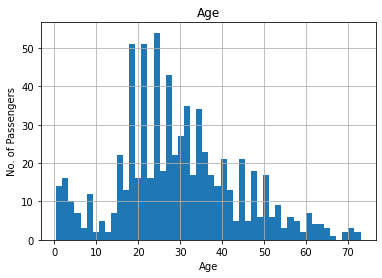

In [12]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of Passengers')

So, only a single outlier was handled with above calculation and 6 outliers still remanined. 
However, the fact that only a single outlier was replaced doesn't necessarily make this a bad technique to handle outliers. This technique will come in quite handy when there are outliers in dataset with large range of numerical values. To see the full extent of how well this technique performs, try implementing it on another problem like Housing Price Prediction which has many numerical columns 

Now, consider the Fare variable in which I have implemented IQR technique for outlier feature engineering. This will give us a much better visualization in terms of boxplot on how we have handled the outliers.

# 2. Fare

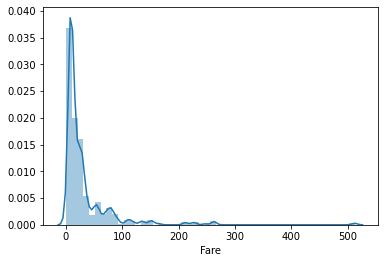

In [13]:
sns.distplot(df['Fare'].dropna())

Text(0, 0.5, 'No. of Passengers')

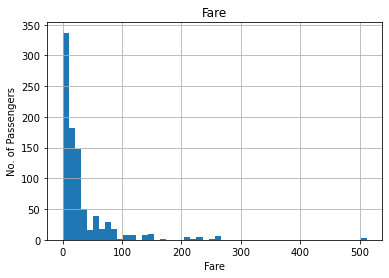

In [14]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passengers')

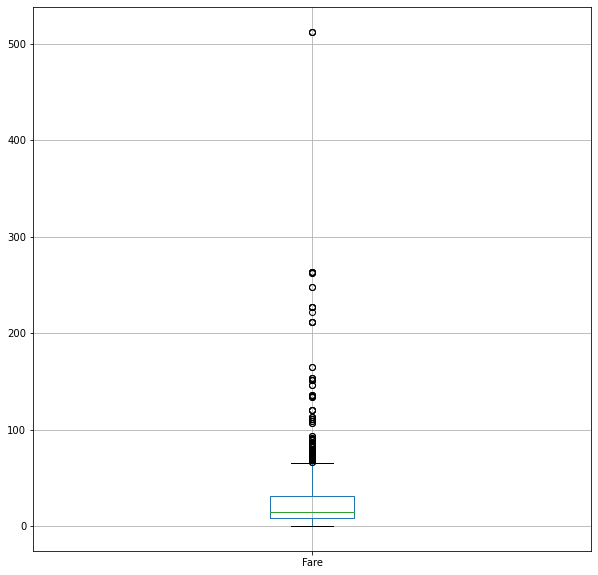

In [15]:
df.boxplot(column="Fare",figsize=(10,10))

In [16]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Here, we'll be using IQR technique because the 'Fare' feature variable is skewed i.e. not normally distributed.

In [17]:
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [18]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [19]:
df.loc[df['Fare']>=66,'Fare']=66

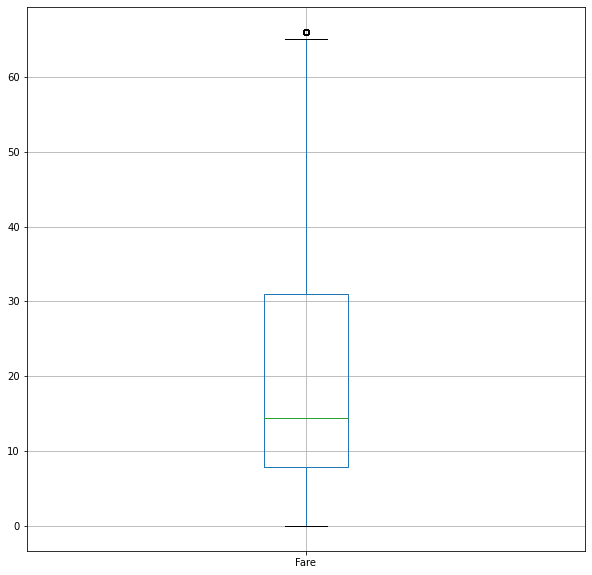

In [20]:
df.boxplot(column="Fare",figsize=(10,10))

Text(0, 0.5, 'No. of Passengers')

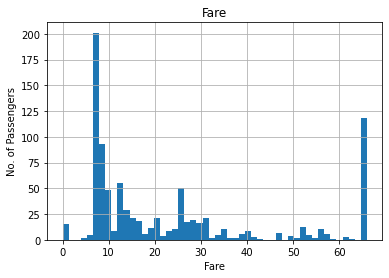

In [21]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passengers')

So, from implementing this IOR technique for outlier feature engineering, we now only have a single outlier present in the dataset as opposed to many that were present before.